# ACML Assignment 1

#### This project demonstrates the implementation of linear regression to predict a country's average life expectancy.

1. The first section will demonstrate linear regression using only 1 feature from the data set

2. The second section will attempt to train the whole dataset with every feature included but without scaling and standardisation

3. The third section will attempt to improve on the second section by adding in feature standardisation and Regularization

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (15,10)

## Data Handling

In [ ]:
#read in data
df = pd.read_csv('Life_Expectancy_Data.csv',sep=r'\s*,\s*', engine='python')

In [7]:
#remove categorical data
df = df._get_numeric_data()

#Deal with missing data
df = df[df['Life expectancy'].notna()] #drop rows without life expectancy value
df= df.fillna(df.mean())# impute other columns with the columns mean

#create numpy matrices
X = df.drop('Life expectancy',axis=1).to_numpy()
X=np.append(np.ones((X.shape[0],1)),X,axis=1) #add column of 1s
y = df['Life expectancy'].to_numpy()

#split train and test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialising weights
theta = np.zeros(X.shape[1])
thetas={} #will store all the thetas found from the various training methods
n=df.shape[0] #number of training examples
d=df.shape[1] #number of features

#parameters
epsilon = 0.1
learning_rate = 0.1

Cost function: $J(\theta) = \frac{1}{2n} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2 $

implemented in vectorised form:



In [8]:
def cost(X,y,theta):
    n_examples= X.shape[0]
    h= np.dot(X,theta) #don't need to transpose theta as in numpy row vectors and column vectors are the same
    return (1/(2*n_examples))*np.sum(np.square(h-y))

Vectorized multivariable gradient descent for Linear regression:

In [257]:
def gradient_descent(X,y,theta,alpha,epsilon,max_iterations):
    n= X.shape[0]
    j = []
    i=0
    old_theta=theta+1
    running=True
    all_thetas=[]
    plot_interval = int(max_iterations/100) #Since some ..............
    
    while(np.linalg.norm(theta-old_theta)>epsilon and i<max_iterations):
        i+=1
        if(i%plot_interval ==0): 
            all_thetas.append(theta)
            print('.', end="")
            j.append(cost(X,y,theta)) 
        old_theta=theta
        
        #GD step  
        h=np.dot(X,theta)
        theta= theta - (alpha/n)*(np.dot((h-y),X))
    
    #output
    j.append(cost(X,y,theta)) 
    print(f"\n finished in {i} iterations")
    if np.isinf(j[len(j)-1]) or np.isnan(j[len(j)-1]):
        print('Diverged')
    return all_thetas, j

## Section 1
### single feature linear regression
This section aims to demonstrate the working of gradient descent with linear regression using 1 feature. This therefore allows for data representation that could only be achieved in a lower dimension

Adult mortality was chosen as the one feature as it has a recognizable correlation with Life expectancy. The bias value of 1's is also included in the input matrix.

Text(0, 0.5, 'life expectancy')

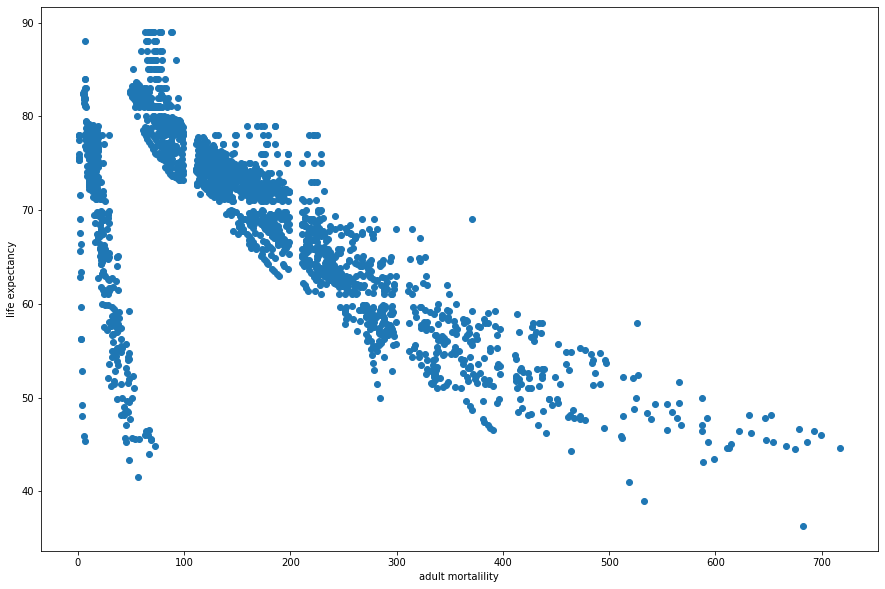

In [258]:
#As shown in the figure below,
#Adult mortalility of a country has quite a recognisable relationship with life expectancy
#it is therefore a good feature to use if only using 1.

X_one_feature =X[:,[0,2]] #X matrix containing a row of ones and only the adult mortalility feature
X_test_one_feature = X_test[:,[0,2]]
theta_one_feature=theta[0:2]# 2 dimensional vector of zeros

plt.scatter(X_one_feature[:,1],y)
plt.xlabel("adult mortalility")
plt.ylabel("life expectancy")

The compare_learning_rates() function is used takes an input of many learning rates and plots them all on a single figure. 

when it calls the gradient descent function it sets epsilon to 0 so that GD runs for the max iterations. This therefore allows each learning rate to be compared accurately due to the fact that all data was collected over the same amount of iterations.

In [259]:
#test learning rate convergence/divergence
def compare_learning_rates(X,y,theta,alphas,iterations):
    fig1, ax3 = plt.subplots()
    for lr in alphas:
        print(f"{lr}:",end=" ")
        _,j = gradient_descent(X,y,theta,lr,0,iterations)
        if j:ax3.plot(j, label = lr)
    ax3.legend(loc="upper left")


Diverging learning rate for 1 feature:

A low amount of iterations is used as not many are needed to show divergance

5e-05: ....................................................................................................
 finished in 100 iterations


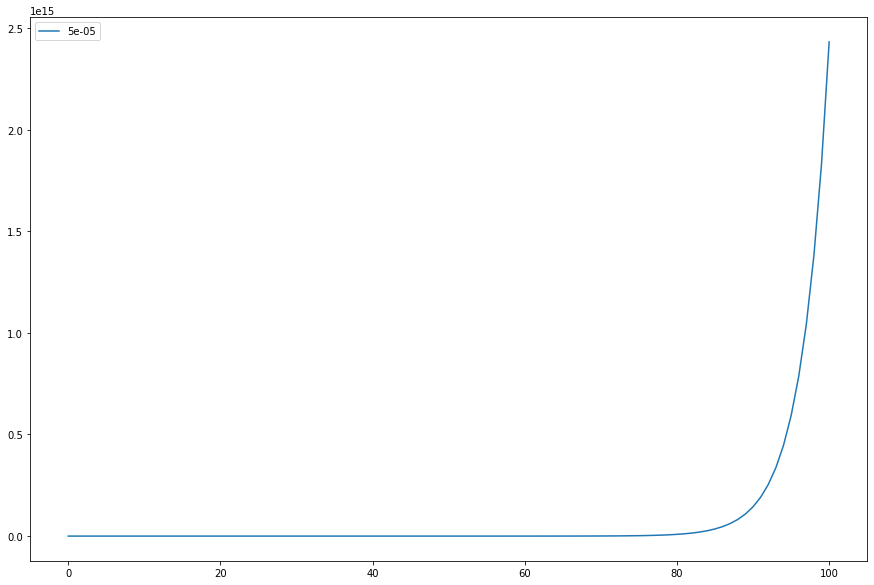

In [260]:
alphas = [0.00005]
test_learning_rates(X_one_feature,y,theta_one_feature,alphas,100)
#as seen in the outputs below GD diverged with the the learning rate: 0.00005
#therefore any rate above this will cause GD to diverge

Since 0.00005 diverges any learning rate above that would also diverge. Because such a low learning rate is required a very large amount of iterations need to take place for convergence.



Finding optimal learning rate for 1 feature X:

4e-05: ....................................................................................................
 finished in 250000 iterations
3e-05: ....................................................................................................
 finished in 250000 iterations
2e-05: ....................................................................................................
 finished in 250000 iterations
1e-05: ....................................................................................................
 finished in 250000 iterations
1e-06: ....................................................................................................
 finished in 250000 iterations


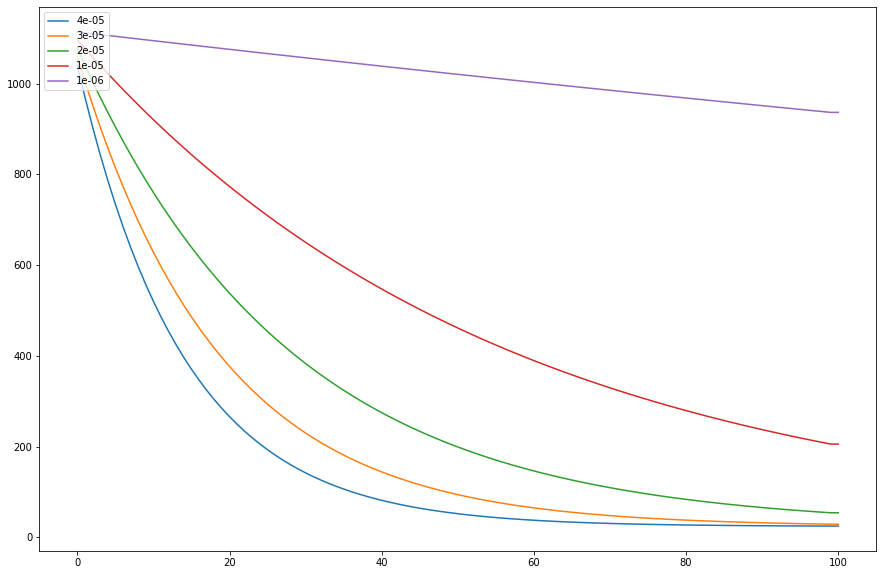

In [285]:

alphas = [0.00004,0.00003,0.00002,0.00001,0.000001]
test_learning_rates(X_one_feature,y,theta_one_feature,alphas,250000) 

Out of the remaining learning rates that were plotted above, 0.00004 converges the fastest 
and is therefore the ideal learning rate.

We will run gradient descent using this learning rate below. We include a non-zero epsilon this time because we are not comparing the learining rates and therefore want GD to stop as soon as it converges

.............................................................................
 finished in 232195 iterations
Training set cost = 25.125302946123725
Test set cost = 23.390118465473705


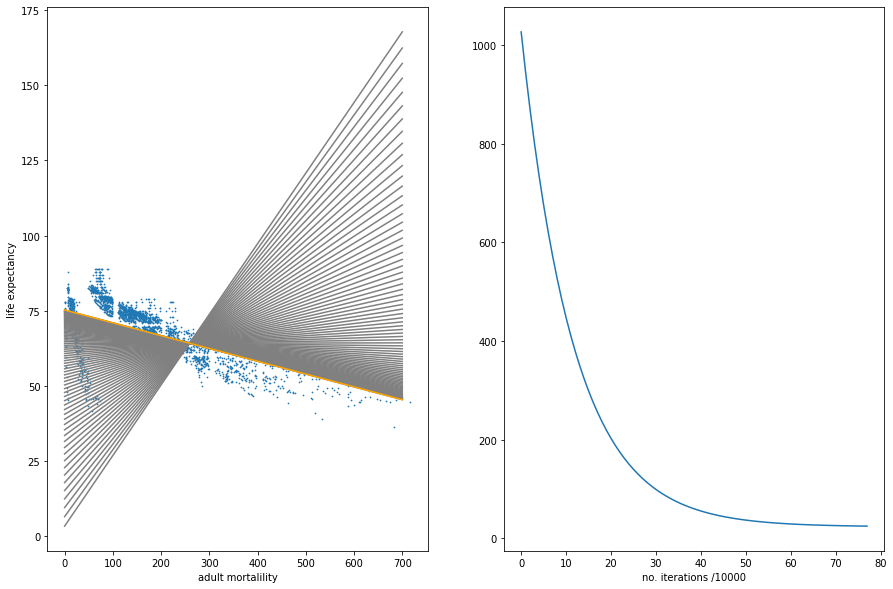

In [296]:
all_thetas,j = gradient_descent(X_one_feature,y,theta_one_feature,0.00004,0.00004,300000) #1 feature GD- adult mortality
thetas['one-feature'] = all_thetas[len(all_thetas)-1]
print(f"Training set cost = {cost(X_one_feature,y,thetas['one-feature'])}")
print(f"Test set cost = {cost(X_test_one_feature,y_test,thetas['one-feature'])}")

#plotting
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X_one_feature[:,1],y,s=0.5)
ax1.set_xlabel("adult mortalility")
ax1.set_ylabel("life expectancy")
x_plot = np.linspace(0,700,100)
ax2.set_xlabel("cost")
ax2.set_xlabel("no. iterations /10000")
for thet in all_thetas:
    ax1.plot(x_plot, thet[0]+x_plot*thet[1], color='grey')

ax2.plot(j)
ax1.plot(x_plot,thetas['one-feature'][0]+x_plot*thetas['one-feature'][1], color='orange')
#1st plot shows regression line every 10000 iterations and how it moves until it bb
#fits the data

The gradient descent converged in slightly less iterations than the max but is still very large. Feature scaling could help with this

We can see in the left graph above, the many hypothesis functions until it fit the data where the hypothesis function is represented by the orange line.

## Section 2
### Many feature linear regression - without Standardisation
This section aims to demonstrate the working of gradient descent with linear regression using many features.

Diverging learning rate for many features without standardisation:

A low amount of iterations is used as not many are needed to show divergance

9e-16: ....................................................................................................
 finished in 100 iterations


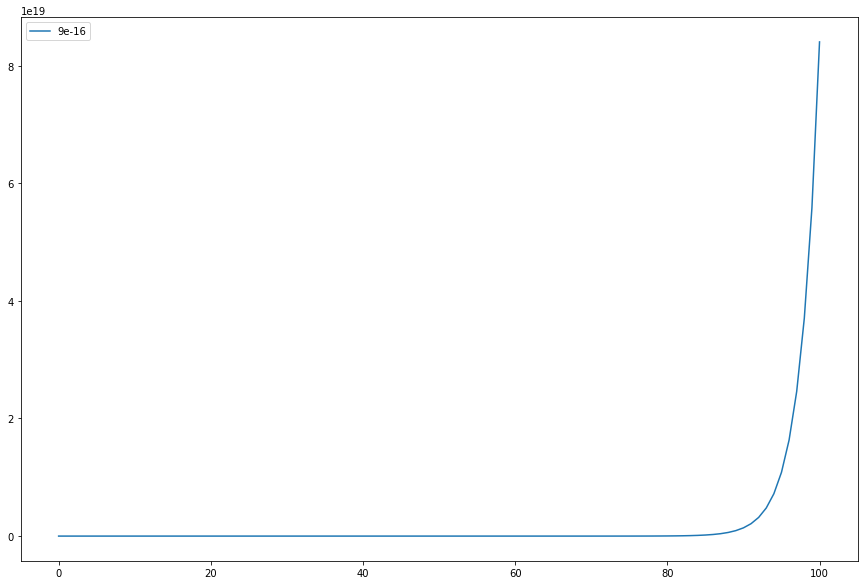

In [287]:
alphas = [9e-16]
test_learning_rates(X,y,theta,alphas,100)
#as seen in the outputs below GD diverged with the the learning rate: 9e-16
#therefore any rate above this will cause GD to diverge

Since 9e-16 diverges any learning rate above that would also diverge. The maximum learning rate is therefore to high to do any meaningful learning. It would therefore take too long to converge.

I will therefore only train for 20000 iterations in order to find the best option for learning rate

Finding optimal learning rate for many unstandardised features:

8e-16: ....................................................................................................
 finished in 20000 iterations
1e-16: ....................................................................................................
 finished in 20000 iterations
1e-17: ....................................................................................................
 finished in 20000 iterations


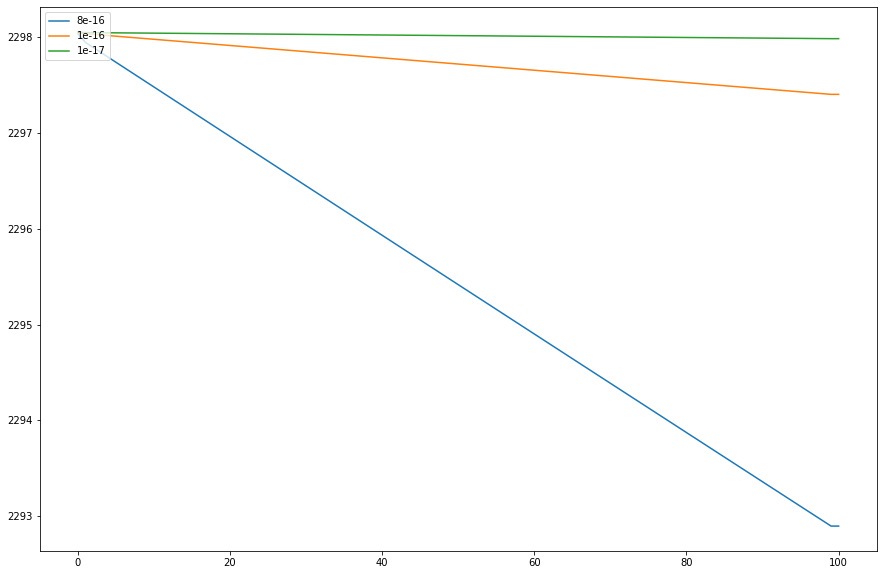

In [288]:
#testing learning rates for many feature training
alphas = [8e-16, 1e-16,1e-17]
test_learning_rates(X,y,theta,alphas,20000)


The graph above shows that 8e-16 would be the best option for learning rate

It is however still not ideal as the required learning rate is ridiculously low and it would take incredibly long to converge. This happens due to data being at vastly different scales and later standardisation should fix this


In [297]:
all_thetas,j=gradient_descent(X,y,theta,8e-16,0.00000000000004,50000)
thetas['base'] = all_thetas[len(all_thetas)-1]
print(f"Training set cost = {cost(X,y,thetas['base'])}")
print(f"Test set cost = {cost(X_test,y_test,thetas['base'])}")
#since data isn't normalised a very low learning rate is needed in order to not diverge
#it therefore takes very long to reach a good final cost

....................................................................................................
 finished in 50000 iterations
Training set cost = 2285.242504046775
Test set cost = 2397.8969431001433


The cost is shown above to be quite high after many iterations. This is due to the lack of standardisation which leads to an extremely low maximum training rate and long training times

## Section 3
### Many feature linear regression - with Standardisation and Regularisation
This section aims to demonstrate the working of gradient descent with linear regression using many **standardised** features with **regularisation**.

Feature Standardisation:

In [291]:
for i in range(1,X.shape[1]):
    X_standardised[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    X_test_standardised[:,i]=(X_test[:,i]-np.mean(X_test[:,i]))/np.std(X_test[:,i])

Diverging learning rate for many features after standardisation:

0.4: ....................................................................................................
 finished in 100 iterations


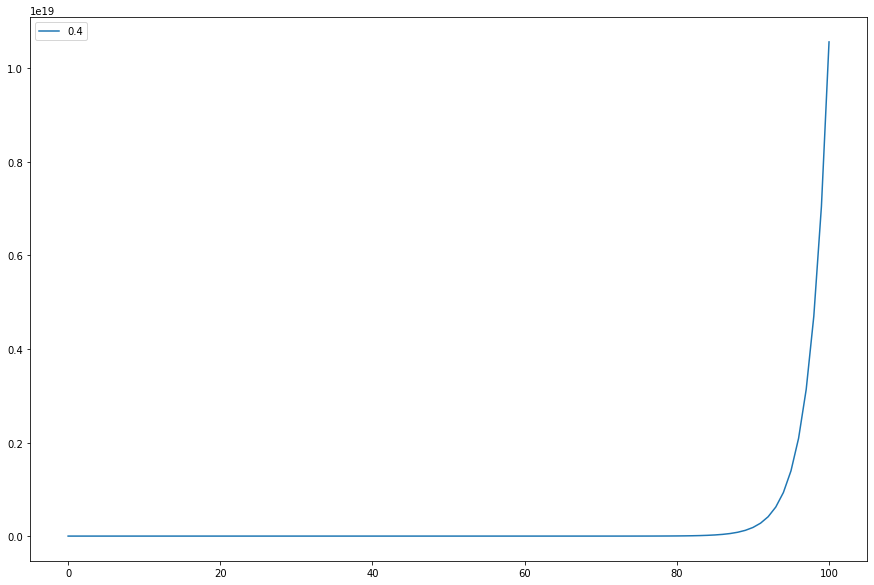

In [268]:

alphas = [0.4]
test_learning_rates(X_standardised,y,theta,alphas,100)

We can see that the learning maximum learning rate is much higher after feature scaling and will therefore train many orders of magnitude more efficiently

Finding optimal learning rate for many standardised features:

0.3: ....................................................................................................
 finished in 100 iterations
0.1: ....................................................................................................
 finished in 100 iterations
0.01: ....................................................................................................
 finished in 100 iterations
0.001: ....................................................................................................
 finished in 100 iterations


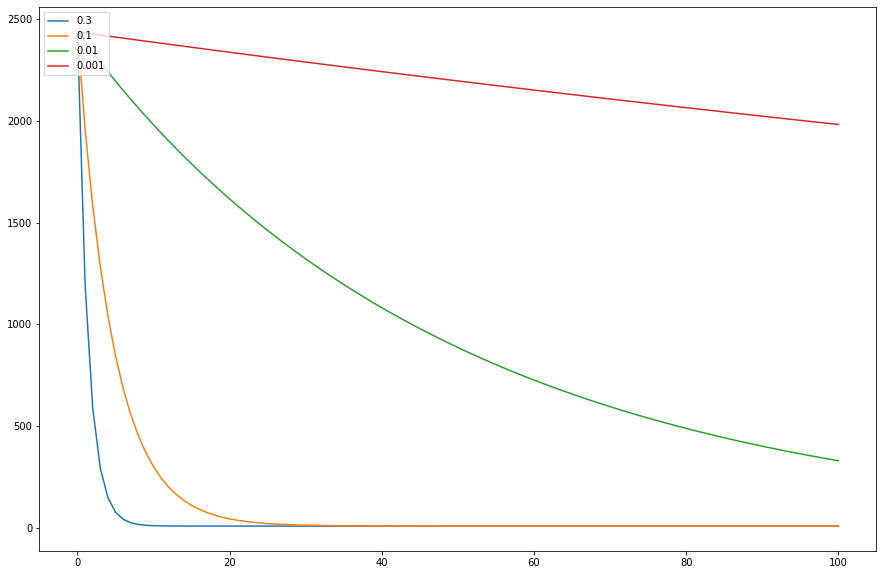

In [292]:
#testing learning rates for many feature training after standardisation
alphas = [0.3,0.1,0.01,0.001]
test_learning_rates(X_standardised,y,theta,alphas,100)

It can be seen in the figure above that 0.3 is the optimal learning rate and is much higher than previosly found learning rates

Training using 0.3 as learning rate:

In [284]:
all_thetas,j= gradient_descent(X_standardised,y,theta,0.3,0.1,100)
thetas['standardised'] = all_thetas[len(all_thetas)-1]
print(f"Training set cost = {cost(X_standardised,y,thetas['standardised'])}")
print(f"Test set cost = {cost(X_test_standardised,y_test,thetas['standardised'])}")

.................
 finished in 17 iterations
Training set cost = 8.743811297496668
Test set cost = 8.65390697031134


After scaling the algorthm trained for only 17 iterations an got to a very low cost of 8.743811297496668 on the training set and 8.65390697031134 on the test set. This heavily beats the unstandardised data which got to a test cost of 2397.8969431001433 after 50000 iterations

Regularised gradient descent (same as gradient descent code but added regularization term):

In [298]:
def gradient_descent_regularized(X,y,theta,alpha,epsilon,max_iterations,lambd):
    n= X.shape[0]
    j = []
    i=0
    old_theta=theta+1
    running=True
    all_thetas=[]
    plot_interval = int(max_iterations/100) #Since some many iterations.....
    
    while(np.linalg.norm(theta-old_theta)>epsilon and i<max_iterations):
        i+=1
        if(i%plot_interval ==0): 
            all_thetas.append(theta)
            print('.', end="")
            j.append(cost(X,y,theta)) 
        old_theta=theta
        
        #GD step  
        h=np.dot(X,theta)
        theta= theta*(1-(alpha*lambd)/n)  - (alpha/n)*(np.dot((h-y),X))
    j.append(cost(X,y,theta)) 
    #output
    print(f"\n finished in {i} iterations")
    if np.isinf(j[len(j)-1]) or np.isnan(j[len(j)-1]):
        print('Diverged')
    return all_thetas, j

In [283]:
all_thetas,j = gradient_descent_regularized(X_standardised,y,theta,0.3,0.1,100,0.4)
thetas['regularized'] = all_thetas[len(all_thetas)-1]
print(f"Training set cost = {cost(X_standardised,y,thetas['regularized'])}")
print(f"Test set cost = {cost(X_test_standardised,y_test,thetas['regularized'])}")

.................
 finished in 17 iterations
Training set cost = 8.746549628261292
Test set cost = 8.660771598418933


Regularization does not do much in this example due to the fact that the algorithm was not overfitting. It therefore does not make much difference to the output.

## Conclusion
It can be concluded that a single feature can be trained somewhat efficiently but has limitations when trying to minimize cost. We can also conclude that standardisation plays a huge role in increasing the efficiency of linear regression. It can also be seen that regularization can be useful but is not needed when the algorithm is not overfitting